In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vitals-data/DF Ready for Generation.csv
/kaggle/input/human-vital-sign-dataset/human_vital_signs_dataset_2024.csv


In [7]:
vitals_data = pd.read_csv('/kaggle/input/vitals-data/DF Ready for Generation.csv')
vitals_data.head(20)

,Hour,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,ICULOS,Patient_ID
0,0,97.0,95.0,36.1100,98.0,75.330,19.0,83.14,0,1,1
1,1,97.0,95.0,36.1100,98.0,75.330,19.0,83.14,0,2,1
2,2,89.0,99.0,36.1100,122.0,86.000,22.0,83.14,0,3,1
3,3,90.0,95.0,36.1100,122.0,88.665,30.0,83.14,0,4,1
4,4,103.0,88.5,36.1100,122.0,91.330,24.5,83.14,0,5,1
5,5,110.0,91.0,36.1100,122.5,84.165,22.0,83.14,0,6,1
6,6,108.0,92.0,36.1100,123.0,77.000,29.0,83.14,0,7,1
7,7,106.0,90.5,36.3750,93.0,76.330,29.0,83.14,0,8,1
8,8,104.0,95.0,36.6400,133.0,88.330,26.0,83.14,0,9,1
9,9,102.0,91.0,36.9050,134.0,87.330,30.0,83.14,0,10,1


In [8]:
data = pd.read_csv("/kaggle/input/human-vital-sign-dataset/human_vital_signs_dataset_2024.csv")
data.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [9]:
patients_df = pd.DataFrame(data)

# Fill missing values
patients_df.fillna(method='ffill', inplace=True)

# Convert data types
patients_df['Timestamp'] = pd.to_datetime(patients_df['Timestamp'])
patients_df['Oxygen Saturation'] = patients_df['Oxygen Saturation'].astype(float)
patients_df['Diastolic Blood Pressure'] = patients_df['Diastolic Blood Pressure'].astype(float)
patients_df['Gender'] = patients_df['Gender'].astype('category')

# Remove duplicates
patients_df.drop_duplicates(subset=['Patient ID', 'Timestamp'], inplace=True)

# Display cleaned DataFrame
print(patients_df.head())

   Patient ID  Heart Rate  Respiratory Rate                  Timestamp  \
0           1          60                12 2024-07-19 21:53:45.729841   
1           2          63                18 2024-07-19 21:52:45.729841   
2           3          63                15 2024-07-19 21:51:45.729841   
3           4          99                16 2024-07-19 21:50:45.729841   
4           5          69                16 2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0         36.861707          95.702046                      124   
1         36.511633          96.689413                      126   
2         37.052049          98.508265                      131   
3         36.654748          95.011801                      118   
4         36.975098          98.623792                      138   

   Diastolic Blood Pressure  Age  Gender  Weight (kg)  Height (m)  \
0                      86.0   37  Female    91.541618    1.679351   
1             

/tmp/ipykernel_30/4246838179.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  patients_df.fillna(method='ffill', inplace=True)


In [10]:
# Count the number of records for each patient
patient_data_count = patients_df.groupby('Patient ID').size().reset_index(name='Record Count')

# Display the result
print(patient_data_count)

        Patient ID  Record Count
0                1             1
1                2             1
2                3             1
3                4             1
4                5             1
...            ...           ...
200015      200016             1
200016      200017             1
200017      200018             1
200018      200019             1
200019      200020             1

[200020 rows x 2 columns]


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  2


In [11]:
if physical_devices:
    try:
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set to True for all GPUs")
    except RuntimeError as e:
        print(e)

Memory growth set to True for all GPUs


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Enable GPU acceleration if available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load the data
df = pd.read_csv('/kaggle/input/vitals-data/DF Ready for Generation.csv')

# Prepare the data
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split data by patient
patients = df['Patient_ID'].unique()
train_patients, test_patients = train_test_split(patients, test_size=0.2, random_state=42)

train_data = df[df['Patient_ID'].isin(train_patients)][features].values
test_data = df[df['Patient_ID'].isin(test_patients)][features].values

# Define and compile the autoencoder model
input_dim = len(features)
encoding_dim = 3

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Add the callback to your model.fit() function
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, callbacks=[tensorboard_callback])

# Function to detect anomalies
def detect_anomalies(data, model, threshold_percentile=95):
    reconstructions = model.predict(data)
    mse = np.mean(np.power(data - reconstructions, 2), axis=1)
    threshold = np.percentile(mse, threshold_percentile)
    return mse > threshold, mse

# Detect anomalies for each patient
anomaly_results = {}
for patient_id in test_patients:
    patient_data = df[df['Patient_ID'] == patient_id][features].values
    anomalies, mse = detect_anomalies(patient_data, autoencoder)
    anomaly_results[patient_id] = {
        'anomalies': anomalies,
        'mse': mse,
        'data': patient_data,
        'hours': df[df['Patient_ID'] == patient_id]['Hour'].values
    }

# Visualize results for a sample patient
sample_patient = list(anomaly_results.keys())[0]
patient_result = anomaly_results[sample_patient]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.plot(patient_result['hours'], patient_result['data'][:, i], label='Actual')
    plt.scatter(patient_result['hours'][patient_result['anomalies']], 
                patient_result['data'][patient_result['anomalies'], i], 
                color='red', label='Anomaly')
    plt.title(f'{feature} for Patient {sample_patient}')
    plt.xlabel('Hour')
    plt.ylabel('Normalized Value')
    plt.legend()

plt.tight_layout()
plt.savefig('anomaly_detection_results.png')
plt.close()

# Generate summary report
summary_report = f"Anomaly Detection Summary\n"
summary_report += f"Total patients analyzed: {len(test_patients)}\n"
summary_report += f"Features analyzed: {', '.join(features)}\n\n"

for patient_id, result in anomaly_results.items():
    anomaly_count = np.sum(result['anomalies'])
    summary_report += f"Patient {patient_id}:\n"
    summary_report += f"  Total hours: {len(result['hours'])}\n"
    summary_report += f"  Anomalies detected: {anomaly_count}\n"
    summary_report += f"  Anomaly percentage: {anomaly_count/len(result['hours'])*100:.2f}%\n\n"

with open('anomaly_detection_summary.txt', 'w') as f:
    f.write(summary_report)

print("Anomaly detection completed. Results saved as 'anomaly_detection_results.png' and 'anomaly_detection_summary.txt'.")

Epoch 1/50


I0000 00:00:1733422037.942269     104 service.cc:145] XLA service 0x5691fb4d7840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733422037.942318     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733422037.942325     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733422039.752246     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38396/38396 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 0.1369
Epoch 4/50
37927/38396 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1297

GPU is available and configured for memory growth
Epoch 1/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.3080 - val_loss: 0.2780
Epoch 2/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2772 - val_loss: 0.2770
Epoch 3/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2743 - val_loss: 0.2754
Epoch 4/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2733 - val_loss: 0.2750
Epoch 5/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2744 - val_loss: 0.2751
Epoch 6/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2718 - val_loss: 0.2764
Epoch 7/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2720 - val_loss: 0.2742
Epoch 8/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2716 - val_loss: 0.2744
Epoch 9/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2703 - val_loss: 0.2743
Epoch 10/100
11348/11348 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2705 - val_loss: 0.2728
Epoch 11/100
11348/11348 ━━━━

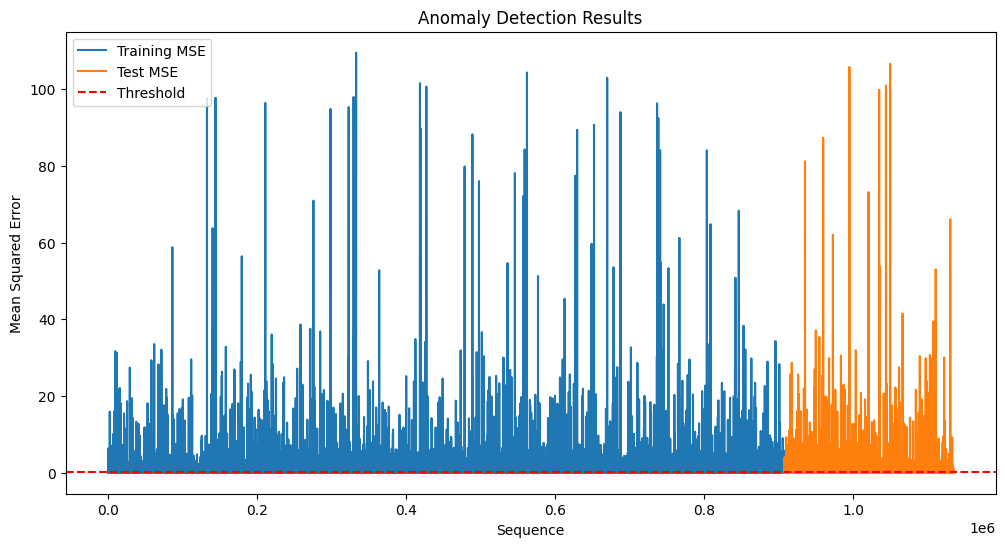

28369/28369 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
7093/7093 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Detected 11437 anomalies out of 226948 sequences


In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Check for GPU availability and set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and configured for memory growth")
else:
    print("No GPU available, using CPU")

# Load and prepare data
df = pd.read_csv('/kaggle/input/vitals-data/DF Ready for Generation.csv')
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Create sequences
sequence_length = 10
sequences = []
labels = []

for patient_id in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient_id][features].values
    for i in range(len(patient_data) - sequence_length):
        sequences.append(patient_data[i:i+sequence_length])
        labels.append(patient_data[i+sequence_length])

sequences = np.array(sequences)
labels = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Define model
from tensorflow.keras.layers import Input

# Define model
inputs = Input(shape=(sequence_length, len(features)))
x = LSTM(64, activation='relu', return_sequences=True)(inputs)
x = LSTM(32, activation='relu')(x)
outputs = Dense(len(features))(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')

# Train model
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )

# Anomaly detection function
def detect_anomalies(model, data, threshold):
    predictions = model.predict(data)
    mse = np.mean(np.power(data[:, -1, :] - predictions, 2), axis=1)
    return mse > threshold

# Compute threshold and detect anomalies
with tf.device('/GPU:0'):
    train_predictions = model.predict(X_train)
    train_mse = np.mean(np.power(X_train[:, -1, :] - train_predictions, 2), axis=1)
    threshold = np.percentile(train_mse, 95)
    
    test_predictions = model.predict(X_test)
    test_mse = np.mean(np.power(X_test[:, -1, :] - test_predictions, 2), axis=1)
    anomalies = detect_anomalies(model, X_test, threshold)

print(f"Detected {np.sum(anomalies)} anomalies out of {len(X_test)} sequences")

# Visualization functions (same as before)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(np.arange(len(train_mse), len(train_mse) + len(X_test)), 
         np.mean(np.power(X_test[:, -1, :] - model.predict(X_test), 2), axis=1),
         label='Test MSE')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Anomaly Detection Results')
plt.xlabel('Sequence')
plt.ylabel('Mean Squared Error')
plt.show()

import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (Log Scale)')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.yscale('log')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()

def plot_anomaly_detection_results(train_mse, test_mse, threshold, anomalies):
    plt.figure(figsize=(12, 6))
    
    plt.plot(train_mse, label='Training MSE', alpha=0.5)
    plt.plot(np.arange(len(train_mse), len(train_mse) + len(test_mse)), 
             test_mse,
             label='Test MSE', alpha=0.5)
    
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    
    anomaly_indices = np.where(anomalies)[0] + len(train_mse)
    plt.scatter(anomaly_indices, test_mse[anomalies], color='red', label='Anomalies', zorder=5)
    
    plt.legend()
    plt.title('Anomaly Detection Results')
    plt.xlabel('Sequence')
    plt.ylabel('Mean Squared Error')
    plt.yscale('log')
    plt.savefig('anomaly_detection_results.png')
    plt.close()

# After training
plot_training_history(history)

# After anomaly detection
train_predictions = model.predict(X_train)
train_mse = np.mean(np.power(X_train[:, -1, :] - train_predictions, 2), axis=1)
threshold = np.percentile(train_mse, 95)  # Adjust percentile as needed

test_predictions = model.predict(X_test)
test_mse = np.mean(np.power(X_test[:, -1, :] - test_predictions, 2), axis=1)
anomalies = test_mse > threshold

plot_anomaly_detection_results(train_mse, test_mse, threshold, anomalies)

print(f"Detected {np.sum(anomalies)} anomalies out of {len(X_test)} sequences")
# ... (include the plot_training_history and plot_anomaly_detection_results functions here)

# Generate visualizations
plot_training_history(history)
plot_anomaly_detection_results(train_mse, test_mse, threshold, anomalies)

In [ ]:
# Extract anomalous sequences and their corresponding original values
anomalous_sequences = X_test[anomalies]
anomalous_predictions = test_predictions[anomalies]

# Create a DataFrame to store anomaly details
anomaly_details = pd.DataFrame()

# Get the original (unscaled) values for each feature
for i, feature in enumerate(features):
    # Inverse transform the scaled values
    original_values = scaler.inverse_transform(anomalous_sequences[:, -1, :])[:, i]
    predicted_values = scaler.inverse_transform(anomalous_predictions)[:, i]
    
    anomaly_details[f'{feature}_actual'] = original_values
    anomaly_details[f'{feature}_predicted'] = predicted_values
    anomaly_details[f'{feature}_deviation'] = np.abs(original_values - predicted_values)

# Add MSE scores
anomaly_details['anomaly_score'] = test_mse[anomalies]

# Analyze feature-wise anomalies
feature_analysis = pd.DataFrame()
for feature in features:
    feature_analysis[feature] = anomaly_details[f'{feature}_deviation'].describe()

# Visualize feature-wise anomalies
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.scatter(anomaly_details[f'{feature}_actual'], 
                anomaly_details[f'{feature}_predicted'],
                alpha=0.5)
    plt.plot([anomaly_details[f'{feature}_actual'].min(), 
              anomaly_details[f'{feature}_actual'].max()],
             [anomaly_details[f'{feature}_actual'].min(), 
              anomaly_details[f'{feature}_actual'].max()],
             'r--')
    plt.title(f'{feature} Anomalies')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.savefig('feature_wise_anomalies.png')
plt.close()

# Cluster anomalies
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare data for clustering
anomaly_features = anomalous_sequences[:, -1, :]
pca = PCA(n_components=2)
anomaly_2d = pca.fit_transform(anomaly_features)

# Perform clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(anomaly_features)

# Visualize clusters
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    mask = clusters == i
    plt.scatter(anomaly_2d[mask, 0], anomaly_2d[mask, 1], 
                label=f'Cluster {i}', alpha=0.6)
plt.title('Anomalies Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('anomaly_clusters.png')
plt.close()

# Print summary statistics for each cluster
print("\nCluster Analysis:")
for i in range(n_clusters):
    print(f"\nCluster {i} Statistics:")
    cluster_data = anomaly_details[clusters == i]
    for feature in features:
        mean_deviation = cluster_data[f'{feature}_deviation'].mean()
        print(f"{feature} average deviation: {mean_deviation:.2f}")


In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Enable GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and configured")

# Load datasets
train_df = pd.read_csv("/kaggle/input/human-vital-sign-dataset/human_vital_signs_dataset_2024.csv")
test_df = pd.read_csv("/kaggle/input/vitals-data/DF Ready for Generation.csv")

# Select and rename features
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 
           'Oxygen Saturation', 'Systolic Blood Pressure']

column_mapping = {
    'HR': 'Heart Rate',
    'Resp': 'Respiratory Rate',
    'Temp': 'Body Temperature',
    'O2Sat': 'Oxygen Saturation',
    'SBP': 'Systolic Blood Pressure'
}
test_df = test_df.rename(columns=column_mapping)

# Prepare data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])

# Build autoencoder
input_dim = len(features)
encoding_dim = 3

inputs = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(16, activation='relu')(inputs)
encoded = tf.keras.layers.Dense(8, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(8, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(16, activation='relu')(decoded)
outputs = tf.keras.layers.Dense(input_dim)(decoded)

autoencoder = tf.keras.Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Compute reconstruction errors
print("Computing reconstruction errors...")
reconstruction_errors = []
batch_size = 1024

for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    reconstructed = autoencoder.predict(batch, verbose=0)
    error = np.mean(np.square(batch - reconstructed), axis=1)
    reconstruction_errors.extend(error)

reconstruction_errors = np.array(reconstruction_errors)

# Set more selective threshold (99th percentile)
threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold

# Create visualization functions
def plot_training_history():
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Autoencoder Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History (Log Scale)')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig('autoencoder_training.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_anomaly_detection():
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Vital Signs Anomaly Detection Results', fontsize=16)
    
    # Plot reconstruction error distribution
    sns.histplot(reconstruction_errors, bins=50, ax=axes[0,0])
    axes[0,0].axvline(threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')
    axes[0,0].set_title('Reconstruction Error Distribution')
    axes[0,0].set_xlabel('Reconstruction Error')
    axes[0,0].legend()
    
    # Plot feature-wise comparisons
    for idx, feature in enumerate(features[:5]):
        i, j = (idx+1) // 3, (idx+1) % 3
        original = scaler.inverse_transform(X_test)[anomalies][:,idx]
        reconstructed = scaler.inverse_transform(
            autoencoder.predict(X_test)
        )[anomalies][:,idx]
        
        axes[i,j].scatter(original, reconstructed, alpha=0.5)
        axes[i,j].plot([original.min(), original.max()], 
                      [original.min(), original.max()], 
                      'r--')
        axes[i,j].set_title(f'{feature} Anomalies')
        axes[i,j].set_xlabel('Original Value')
        axes[i,j].set_ylabel('Reconstructed Value')
    
    plt.tight_layout()
    plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')
    plt.close()

# Generate visualizations
plot_training_history()
plot_anomaly_detection()

# Add anomaly information to dataset
test_df['Reconstruction_Error'] = reconstruction_errors
test_df['Is_Anomaly'] = anomalies
test_df['Anomaly_Score'] = (reconstruction_errors - reconstruction_errors.mean()) / reconstruction_errors.std()

# Save results
test_df.to_csv('dataset_with_autoencoder_anomalies.csv', index=False)

# Print summary statistics
print("\nAnomaly Detection Summary:")
print(f"Total samples: {len(test_df)}")
print(f"Detected anomalies: {sum(anomalies)} ({sum(anomalies)/len(test_df)*100:.2f}%)")

# Print feature-wise statistics for anomalies
print("\nFeature Statistics for Anomalies:")
for feature in features:
    anomaly_values = test_df[test_df['Is_Anomaly']][feature]
    print(f"\n{feature}:")
    print(f"Mean: {anomaly_values.mean():.2f}")
    print(f"Std: {anomaly_values.std():.2f}")
    print(f"Min: {anomaly_values.min():.2f}")
    print(f"Max: {anomaly_values.max():.2f}")


GPU is available and configured
Epoch 1/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6290 - val_loss: 0.3544
Epoch 2/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3293 - val_loss: 0.2617
Epoch 3/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2484 - val_loss: 0.2033
Epoch 4/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1921 - val_loss: 0.1643
Epoch 5/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1595 - val_loss: 0.1440
Epoch 6/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1319 - val_loss: 0.1117
Epoch 7/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1091 - val_loss: 0.1078
Epoch 8/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1034 - val_loss: 0.1028
Epoch 9/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1014 - val_loss: 0.1006
Epoch 10/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0994 - val_loss: 0.0995
Epoch 11/50
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0993 - val_loss: 0.099

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


47818/47818 ━━━━━━━━━━━━━━━━━━━━ 55s 1ms/step
47818/47818 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step
47818/47818 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step
47818/47818 ━━━━━━━━━━━━━━━━━━━━ 55s 1ms/step
47818/47818 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step

Anomaly Detection Summary:
Total samples: 1530157
Detected anomalies: 15302 (1.00%)

Feature Statistics for Anomalies:

Heart Rate:
Mean: 99.65
Std: 19.11
Min: 20.00
Max: 192.00

Respiratory Rate:
Mean: 35.80
Std: 9.38
Min: 1.00
Max: 100.00

Body Temperature:
Mean: 37.11
Std: 1.07
Min: 20.90
Max: 41.40

Oxygen Saturation:
Mean: 91.38
Std: 13.96
Min: 20.00
Max: 100.00

Systolic Blood Pressure:
Mean: 132.09
Std: 32.81
Min: 22.00
Max: 300.00


In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
%matplotlib inline

# Enable GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and configured")

# Load and prepare datasets
train_df = pd.read_csv("/kaggle/input/human-vital-sign-dataset/human_vital_signs_dataset_2024.csv")
test_df = pd.read_csv("/kaggle/input/vitals-data/DF Ready for Generation.csv")

# Select and rename features
features = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 
           'Oxygen Saturation', 'Systolic Blood Pressure']

column_mapping = {
    'HR': 'Heart Rate',
    'Resp': 'Respiratory Rate',
    'Temp': 'Body Temperature',
    'O2Sat': 'Oxygen Saturation',
    'SBP': 'Systolic Blood Pressure'
}
test_df = test_df.rename(columns=column_mapping)

# Feature engineering
def add_engineered_features(df):
    for feature in features:
        df[f'{feature}_rolling_mean'] = df[feature].rolling(window=5).mean()
        df[f'{feature}_rolling_std'] = df[feature].rolling(window=5).std()
    df = df.fillna(method='bfill')
    return df

train_df = add_engineered_features(train_df)
test_df = add_engineered_features(test_df)

# Update features list with engineered features
engineered_features = features.copy()
for feature in features:
    engineered_features.extend([f'{feature}_rolling_mean', f'{feature}_rolling_std'])

# Prepare data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_df[engineered_features])
test_data = scaler.transform(test_df[engineered_features])

# Create sequences with longer sequence length
def create_sequences(data, seq_length=20):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 20
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Build enhanced LSTM model
def build_model(seq_length, n_features):
    inputs = tf.keras.Input(shape=(seq_length, n_features))
    
    x = LayerNormalization()(inputs)
    x = Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    
    x = LayerNormalization()(x)
    x = Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    
    x = LayerNormalization()(x)
    x = Bidirectional(tf.keras.layers.LSTM(32))(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(len(engineered_features), kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = build_model(seq_length, len(engineered_features))

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Learning rate schedule
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Update callbacks list
callbacks = [
    early_stopping,
    reduce_lr
]

# Compile model
model.compile(optimizer=optimizer, loss='mse')

# Train model
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )

# Predict test data
print("Making predictions...")
test_predictions = model.predict(X_test, batch_size=512, verbose=1)

def detect_anomalies_rule_based(original_data, predictions, scaler):
    # Get original scale data
    original_unscaled = scaler.inverse_transform(original_data)
    predictions_unscaled = scaler.inverse_transform(predictions)
    
    # Calculate reconstruction errors
    reconstruction_errors = np.mean(np.square(original_data - predictions), axis=1)
    
    # Statistical anomalies (3-sigma rule)
    mean_error = np.mean(reconstruction_errors)
    std_error = np.std(reconstruction_errors)
    statistical_anomalies = reconstruction_errors > (mean_error + 3 * std_error)
    
    # Initialize anomaly dictionaries
    vital_anomalies = {}
    rapid_changes = {}
    
    # Define medical bounds
    vital_bounds = {
        'Heart Rate': (40, 150),
        'Respiratory Rate': (8, 30),
        'Body Temperature': (35, 39),
        'Oxygen Saturation': (90, 100),
        'Systolic Blood Pressure': (90, 180)
    }
    
    # Define rapid change thresholds
    change_thresholds = {
        'Heart Rate': 20,
        'Respiratory Rate': 8,
        'Body Temperature': 1,
        'Oxygen Saturation': 4,
        'Systolic Blood Pressure': 20
    }
    
    # Check each feature for anomalies
    for i, feature in enumerate(vital_bounds.keys()):
        # Vital sign bounds check
        vital_anomalies[feature] = (
            (original_unscaled[:, i] < vital_bounds[feature][0]) | 
            (original_unscaled[:, i] > vital_bounds[feature][1])
        )
        
        # Rapid changes check
        changes = np.abs(np.diff(original_unscaled[:, i], prepend=original_unscaled[0, i]))
        rapid_changes[feature] = changes > change_thresholds[feature]
    
    # Combine all anomalies
    combined_anomalies = np.zeros(len(original_data), dtype=bool)
    for feature in vital_bounds.keys():
        combined_anomalies |= vital_anomalies[feature] | rapid_changes[feature]
    combined_anomalies |= statistical_anomalies
    
    return {
        'vital_anomalies': vital_anomalies,
        'rapid_changes': rapid_changes,
        'statistical_anomalies': statistical_anomalies,
        'combined_anomalies': combined_anomalies,
        'reconstruction_errors': reconstruction_errors
    }

# Detect anomalies
print("Detecting anomalies...")
anomaly_results = detect_anomalies_rule_based(y_test, test_predictions, scaler)

# Now calculate metrics
def evaluate_model_performance(y_true, y_pred, anomaly_results):
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    
    # Calculate metrics
    metrics = {
        'Precision': precision_score(anomaly_results['combined_anomalies'], 
                                   anomaly_results['statistical_anomalies']),
        'Recall': recall_score(anomaly_results['combined_anomalies'], 
                             anomaly_results['statistical_anomalies']),
        'F1': f1_score(anomaly_results['combined_anomalies'], 
                      anomaly_results['statistical_anomalies']),
        'ROC_AUC': roc_auc_score(anomaly_results['combined_anomalies'], 
                                anomaly_results['reconstruction_errors'])
    }
    
    # Calculate MSE for each vital sign
    feature_mse = {}
    for i, feature in enumerate(features):
        mse = np.mean(np.square(y_true[:, i] - y_pred[:, i]))
        feature_mse[feature] = mse
    
    return metrics, feature_mse

# Calculate and display metrics
print("\nModel Performance Metrics:")
metrics, feature_mse = evaluate_model_performance(y_test, test_predictions, anomaly_results)

# Print overall metrics
print("\nOverall Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Print feature-wise MSE
print("\nFeature-wise Mean Squared Error:")
for feature, mse in feature_mse.items():
    print(f"{feature}: {mse:.4f}")

# Visualize metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_metrics.png', dpi=300, bbox_inches='tight')
plt.close()

# Create results dataframe
results_df = test_df.iloc[seq_length:].copy()

# Add anomaly columns
for feature in features:
    results_df[f'{feature}_Vital_Anomaly'] = vital_anomalies[feature].astype(int)
    results_df[f'{feature}_Rapid_Change'] = rapid_changes[feature].astype(int)

# Plot results
def plot_results():
    # Training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Anomaly visualization
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i+1)
        
        # Plot original data
        plt.plot(scaler.inverse_transform(y_test)[:, i], 
                label='Original', alpha=0.5)
        
        # Plot vital sign anomalies
        anomaly_idx = np.where(vital_anomalies[feature])[0]
        plt.scatter(anomaly_idx, 
                   scaler.inverse_transform(y_test)[vital_anomalies[feature], i],
                   color='red', label='Vital Sign Anomaly')
        
        # Plot rapid changes
        rapid_idx = np.where(rapid_changes[feature])[0]
        plt.scatter(rapid_idx,
                   scaler.inverse_transform(y_test)[rapid_changes[feature], i],
                   color='orange', label='Rapid Change')
        
        plt.title(f'{feature} Anomalies')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')
    plt.close()

# Generate visualizations and save results
print("Generating visualizations...")
plot_results()
results_df.to_csv('dataset_with_lstm_anomalies.csv', index=False)

# Print summary statistics
print("\nAnomaly Detection Summary:")
for feature in features:
    vital_count = results_df[f'{feature}_Vital_Anomaly'].sum()
    rapid_count = results_df[f'{feature}_Rapid_Change'].sum()
    total = len(results_df)
    
    print(f"\n{feature}:")
    print(f"Vital Sign Anomalies: {vital_count} ({vital_count/total*100:.2f}%)")
    print(f"Rapid Change Anomalies: {rapid_count} ({rapid_count/total*100:.2f}%)")

GPU is available and configured


/tmp/ipykernel_30/134781087.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/tmp/ipykernel_30/134781087.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 1.1825 - val_loss: 0.8273 - learning_rate: 8.7660e-05
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.8605 - val_loss: 0.7293 - learning_rate: 7.6843e-05
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.7833 - val_loss: 0.6974 - learning_rate: 6.7361e-05
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.7515 - val_loss: 0.6836 - learning_rate: 5.9049e-05
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.7342 - val_loss: 0.6756 - learning_rate: 5.1763e-05
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.7248 - val_loss: 0.6700 - learning_rate: 4.5375e-05
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.7164 - val_loss: 0.6646 - learning_rate: 3.9776e-05
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.7108 - val_loss: 0.6610 - learning_rate: 3.4868e-05
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 1

NameError: name 'vital_anomalies' is not defined

In [15]:
# After predictions and anomaly detection
# Adjust results_df to match the sequence length
results_df = test_df.iloc[seq_length:].copy()  # Remove first seq_length rows

# Verify lengths before assignment
print(f"Length of results_df: {len(results_df)}")
print(f"Length of anomaly arrays: {len(anomaly_results['vital_anomalies'][features[0]])}")

# Add anomaly columns
for feature in features:
    results_df[f'{feature}_Vital_Anomaly'] = anomaly_results['vital_anomalies'][feature]
    results_df[f'{feature}_Rapid_Change'] = anomaly_results['rapid_changes'][feature]

Length of results_df: 1530137
Length of anomaly arrays: 1530137


Generating visualizations...


NameError: name 'vital_anomalies' is not defined

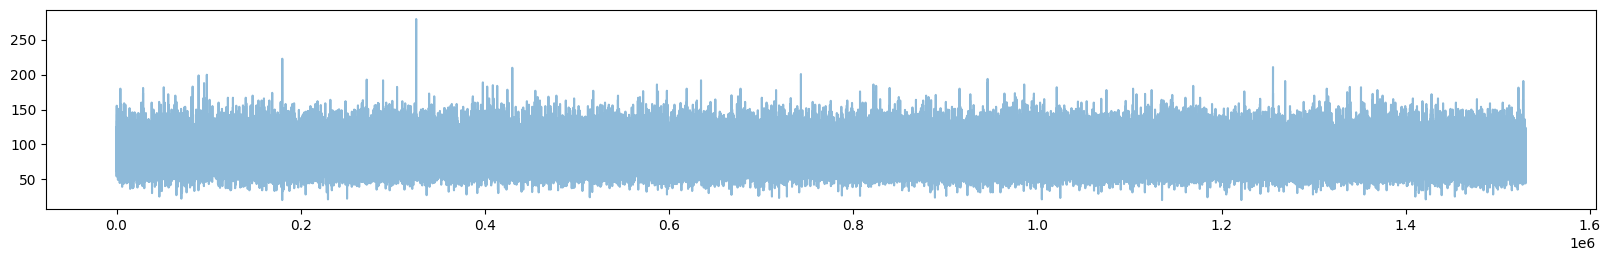

In [16]:


# Plot results
def plot_results():
    # Training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Anomaly visualization
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i+1)
        
        # Plot original data
        plt.plot(scaler.inverse_transform(y_test)[:, i], 
                label='Original', alpha=0.5)
        
        # Plot vital sign anomalies
        anomaly_idx = np.where(vital_anomalies[feature])[0]
        plt.scatter(anomaly_idx, 
                   scaler.inverse_transform(y_test)[vital_anomalies[feature], i],
                   color='red', label='Vital Sign Anomaly')
        
        # Plot rapid changes
        rapid_idx = np.where(rapid_changes[feature])[0]
        plt.scatter(rapid_idx,
                   scaler.inverse_transform(y_test)[rapid_changes[feature], i],
                   color='orange', label='Rapid Change')
        
        plt.title(f'{feature} Anomalies')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')
    plt.close()

# Generate visualizations and save results
print("Generating visualizations...")
plot_results()
results_df.to_csv('dataset_with_lstm_anomalies.csv', index=False)

# Print summary statistics
print("\nAnomaly Detection Summary:")
for feature in features:
    vital_count = results_df[f'{feature}_Vital_Anomaly'].sum()
    rapid_count = results_df[f'{feature}_Rapid_Change'].sum()
    total = len(results_df)
    
    print(f"\n{feature}:")
    print(f"Vital Sign Anomalies: {vital_count} ({vital_count/total*100:.2f}%)")
    print(f"Rapid Change Anomalies: {rapid_count} ({rapid_count/total*100:.2f}%)")

In [16]:
def plot_results():
    # Training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Anomaly visualization
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i+1)
        
        # Get the data and ensure lengths match
        original_data = scaler.inverse_transform(y_test)
        anomaly_mask = vital_anomalies[feature][:len(original_data)]
        rapid_mask = rapid_changes[feature][:len(original_data)]
        
        # Plot original data
        plt.plot(original_data[:, i], label='Original', alpha=0.5)
        
        # Plot vital sign anomalies
        anomaly_idx = np.where(anomaly_mask)[0]
        if len(anomaly_idx) > 0:
            plt.scatter(anomaly_idx, 
                       original_data[anomaly_mask, i],
                       color='red', label='Vital Sign Anomaly')
        
        # Plot rapid changes
        rapid_idx = np.where(rapid_mask)[0]
        if len(rapid_idx) > 0:
            plt.scatter(rapid_idx,
                       original_data[rapid_mask, i],
                       color='orange', label='Rapid Change')
        
        plt.title(f'{feature} Anomalies')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')
    plt.close()

In [19]:
def plot_anomaly_results():
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i+1)
        
        # Plot normal data as a line
        plt.plot(y_test[:, i], color='blue', alpha=0.3, label='Normal')
        
        # Overlay anomalies as scatter points
        anomaly_mask = anomaly_results['vital_anomalies'][feature]
        plt.scatter(np.where(anomaly_mask)[0], 
                   y_test[anomaly_mask, i],
                   c='red', alpha=0.5, label='Anomaly',
                   s=20)
        
        plt.title(f'{feature} Anomalies')
        plt.xlabel('Sequence')
        plt.ylabel('Normalized Value')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

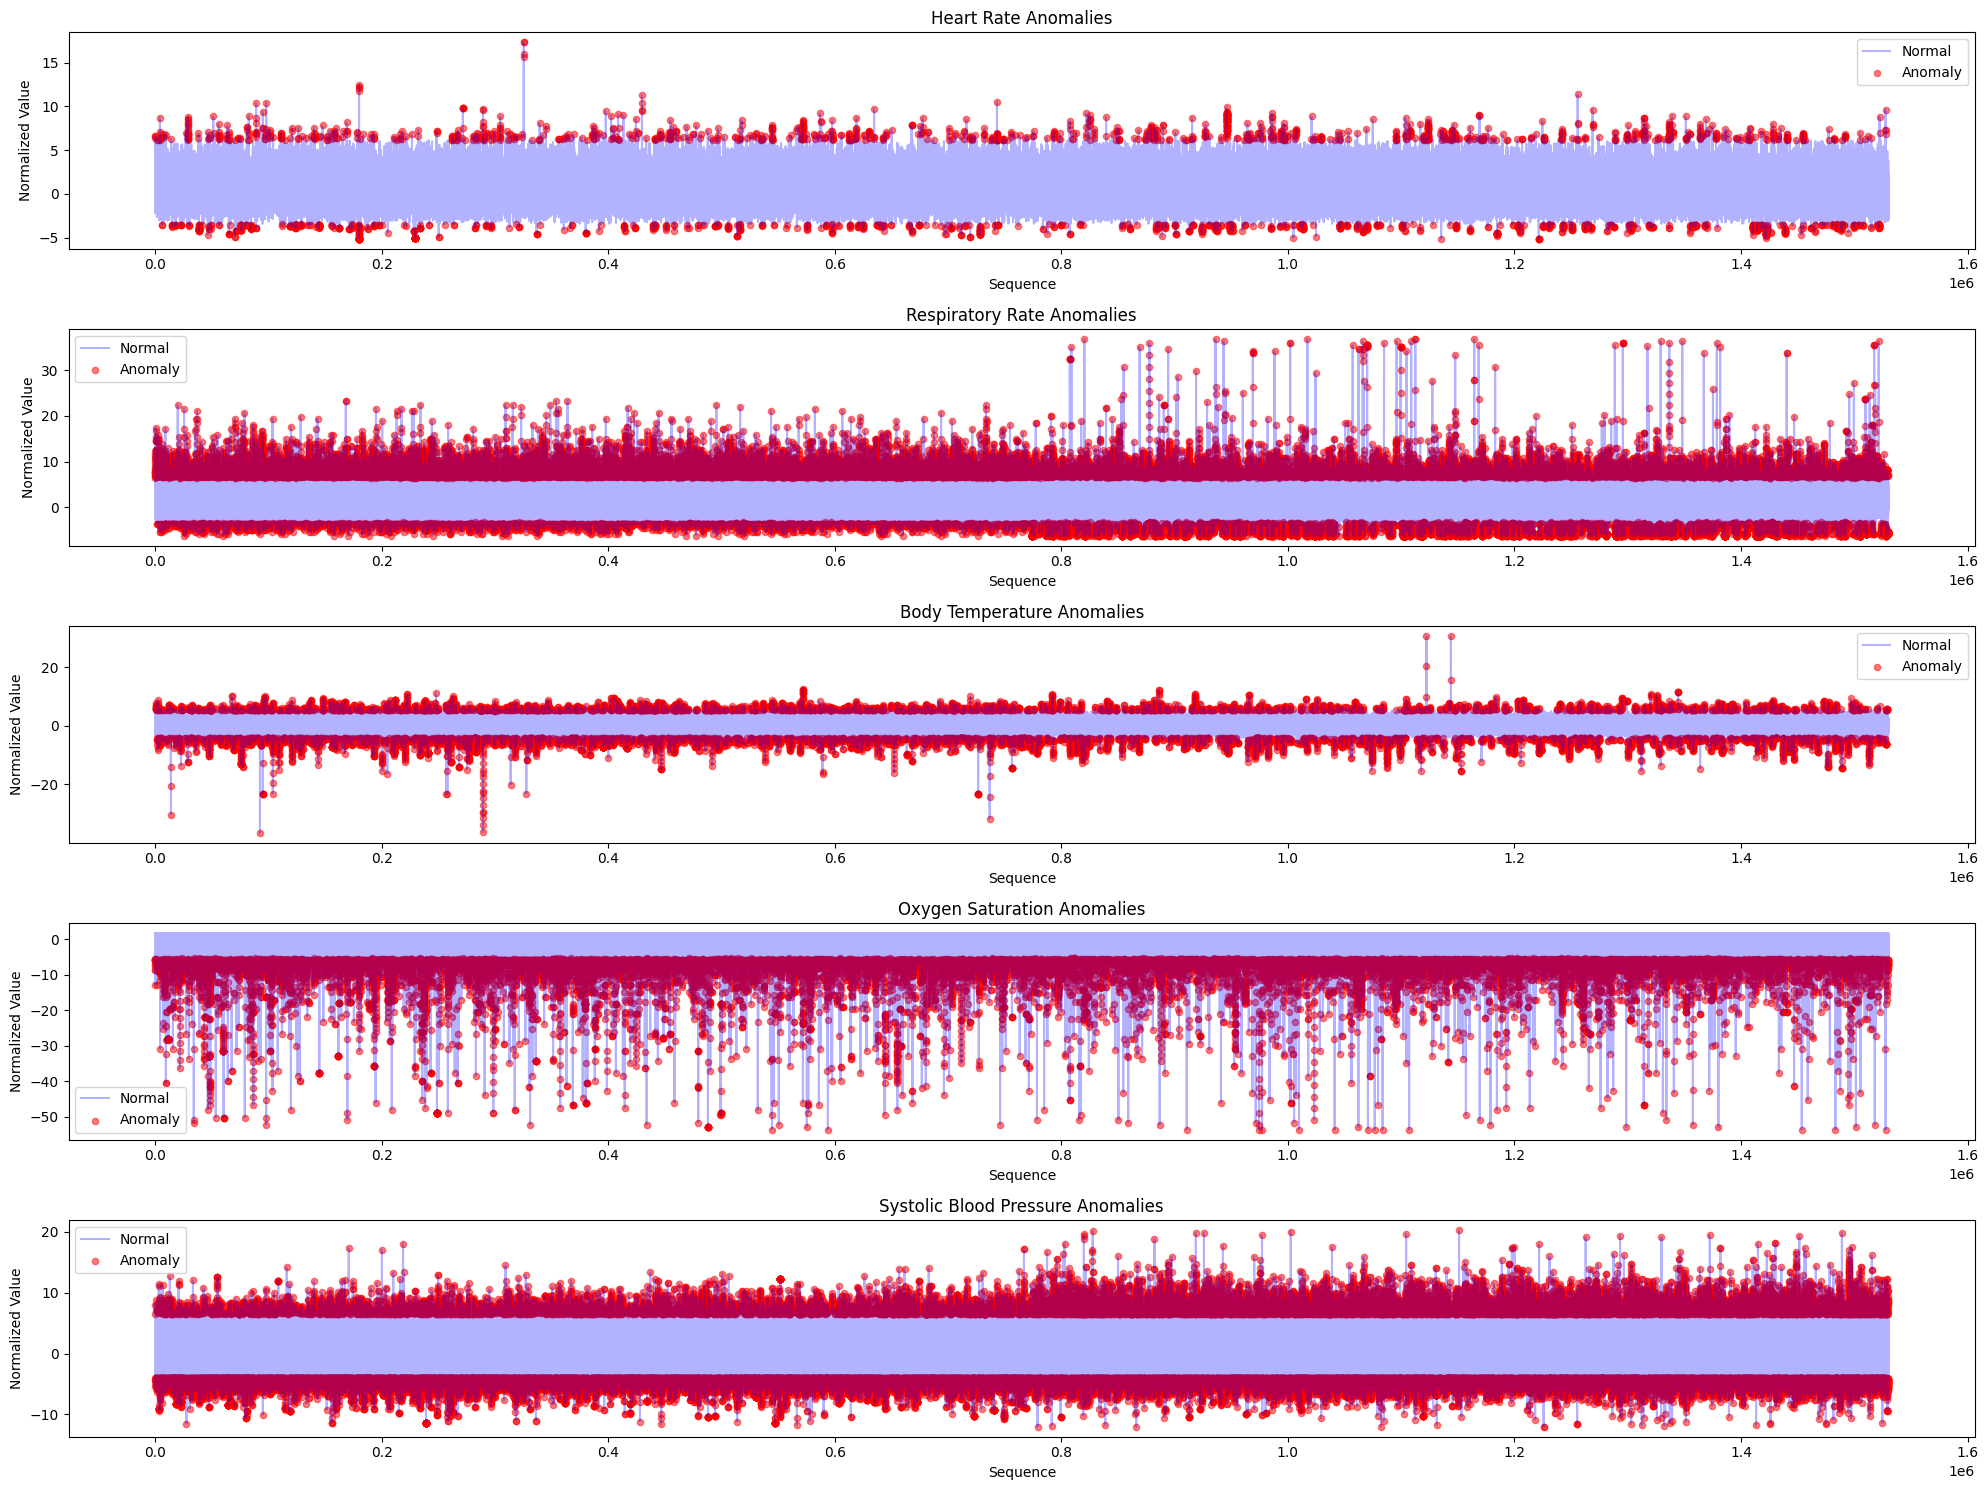

In [21]:
# After anomaly detection
plot_anomaly_results()